In [ ]:
import numpy as np
import pandas as pd
import os
import gzip
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 4.2 Анализ текста сообщений (продолжение)

Смотрим на столбец `serv_mess`

In [ ]:
# vibo: читаем предобработанный лог (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)

In [ ]:
data_logs

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,NaN,NaN


In [ ]:
# vibo: сводная статистика
data_logs[['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'plug_name', 'plug_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess,plug_name,plug_mess
count,6544,6544,6544,6544,6092,452,441
unique,10,1306,6,3,913,3,50
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%,WorldEdit,
freq,1093,115,5444,6392,674,218,44


Делаем новый датафрейм с которым будем работать

In [ ]:
summary = data_logs[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'user_authenticator_number', 'worker_main_number', 'async_chat_thread_number']]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [ ]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6544 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6544 non-null   object 
 1   time                       6544 non-null   object 
 2   serv_teg_inf               6544 non-null   object 
 3   serv_teg                   6544 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 460.1+ KB


In [ ]:
# vibo: удаляем лишнее как и в блоке с анализом основных сообщений сервера
# плагин WorldGuard выдает свой тег в сообщения сервера отдельной группой 
summary = summary[summary['serv_teg_inf'] != 'WorldGuard Region I/O']
# vibo: ищем не нулевые строки
find_index = summary['serv_mess'].dropna().index
# vibo: фильтруем по ним датафрейм
summary = summary[summary.index.isin(find_index)]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [ ]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6092 non-null   object 
 1   time                       6092 non-null   object 
 2   serv_teg_inf               6092 non-null   object 
 3   serv_teg                   6092 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 428.3+ KB


In [ ]:
summary[['date', 'time', 'serv_teg_inf', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_mess
count,6092,6092,6092,6092
unique,10,1285,5,913
top,2023-03-04,21:13:39,Server thread,Preparing spawn area: 0%
freq,1018,115,5003,674


## Server thread

Смотрим на сообщения в категории `Server thread`

In [ ]:
summary[summary['serv_teg_inf'] == 'Server thread']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,NaN,NaN,NaN
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,NaN,NaN,NaN
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,NaN,NaN,NaN
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,NaN,NaN,NaN
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [ ]:
summary[summary['serv_teg_inf'] == 'Server thread'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       5003 non-null   object 
 1   time                       5003 non-null   object 
 2   serv_teg_inf               5003 non-null   object 
 3   serv_teg                   5003 non-null   object 
 4   serv_mess                  5003 non-null   object 
 5   user_authenticator_number  0 non-null      float64
 6   worker_main_number         0 non-null      float64
 7   async_chat_thread_number   0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 351.8+ KB


Видно, что последние три столбца из рассмотрения можно сразу исключить, выделим данные в отдельный датафрейм



In [ ]:
sub_summary = summary[summary['serv_teg_inf'] == 'Server thread'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12
...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand


In [ ]:
sub_summary[sub_summary['serv_teg_inf'] == 'Server thread'].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,5003,5003,5003,5003,5003
unique,10,1028,1,2,782
top,2023-03-04,21:13:39,Server thread,INFO,Custom Map Seeds: Village: 10387312 Desert: ...
freq,845,115,5003,4853,84


Самые популярные сообщения в категории `Server thread`

In [ ]:
# vibo: найдем самые популярные сообщения в категории
summary[summary['serv_teg_inf'] == 'Server thread']['serv_mess'].value_counts()

 Custom Map Seeds:  Village: 10387312 Desert: 14357617 Igloo: 14357618 Jungle: 14357619 Swamp: 14357620 Monument: 10387313 Ocean: 14357621 Shipwreck: 165745295 End City: 10387313 Slime: 987234911 Nether: 30084232 Mansion: 10387319 Fossil: 14357921 Portal: 34222645    84
 Nerfing mobs spawned from spawners: false                                                                                                                                                                                                                                  84
 Sapling Growth Modifier: 100%                                                                                                                                                                                                                                              84
 Beetroot Growth Modifier: 100%                                                                                                                                                            

#### Количество запусков сервера по дням

Здесь под запуском подразумевается успешный запуск из предыдущего раздела. Посмотрим, что из себя представляют сообщения в этой категории. Начинаются они с сообщения о том, что сервер стартует. Надем их. Найдем количество запусков сервера, распределение запусков по дням.

In [ ]:
df_is_start = sub_summary['serv_mess'].map(lambda x: 'Starting minecraft server' in x).to_frame(name='is_start')
ind_is_start = df_is_start[df_is_start['is_start'] == True].index
len(ind_is_start)

27

In [ ]:
plot_df = sub_summary[sub_summary.index.isin(ind_is_start)][['date', 'serv_mess']].groupby(['date']).count().reset_index()
plot_df['%'] = plot_df['serv_mess'] * 100 / plot_df['serv_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
plot_df

,date,serv_mess,%
0,2023-02-13,3,11.11
1,2023-02-14,2,7.41
2,2023-02-17,1,3.70
3,2023-03-03,3,11.11
4,2023-03-04,5,18.52
5,2023-03-05,3,11.11
6,2023-03-06,4,14.81
7,2023-03-07,1,3.70
8,2023-03-08,3,11.11
9,2023-03-09,2,7.41


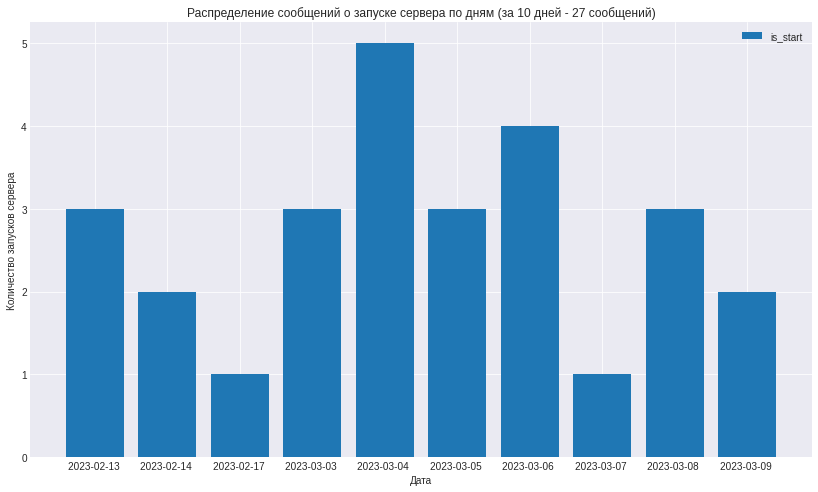

In [ ]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['serv_mess'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "is_start")

  # for i, total in enumerate(values_y):
  #   ax.text(i, total + 0.1, values_y[i], ha='center')

  plt.title(f'Распределение сообщений о запуске сервера по дням (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество запусков сервера')
  plt.show()

После начала запуска сервера идет блок сообщений о загрузке свойств: World Settings For [world], World Settings For [world_nether],  World Settings For [world_the_end]. Этот блок заканчивается сообщением 'Done'. Найдем их.

In [ ]:
# vibo: сохраним, понадобится ниже
groups_x_is_start = plot_df['date'].values
values_y_is_start = plot_df['serv_mess'].values

In [ ]:
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12
...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand


In [ ]:
df_done = sub_summary['serv_mess'].map(lambda x: 'Done' in x).to_frame(name='done')
ind_done = df_done[df_done['done'] == True].index
len(ind_done)

27

In [ ]:
ind_done

Int64Index([ 222,  392,  565,  739,  913, 1094, 1380, 1587, 1818, 1984, 2188,
            2364, 2525, 2686, 3009, 3179, 3492, 3861, 4244, 4502, 4735, 4977,
            5310, 5608, 6026, 6233, 6531],
           dtype='int64')

In [ ]:
plot_df = sub_summary[sub_summary.index.isin(ind_done)]
plot_df

,date,time,serv_teg_inf,serv_teg,serv_mess
222,2023-02-13,21:35:13,Server thread,INFO,"Done (66.075s)! For help, type ""help"""
392,2023-02-13,21:36:58,Server thread,INFO,"Done (12.374s)! For help, type ""help"""
565,2023-02-13,21:59:54,Server thread,INFO,"Done (12.742s)! For help, type ""help"""
739,2023-02-14,20:46:06,Server thread,INFO,"Done (15.752s)! For help, type ""help"""
913,2023-02-14,23:48:28,Server thread,INFO,"Done (13.669s)! For help, type ""help"""
1094,2023-02-17,19:00:13,Server thread,INFO,"Done (13.316s)! For help, type ""help"""
1380,2023-03-03,17:56:41,Server thread,INFO,"Done (14.476s)! For help, type ""help"""
1587,2023-03-03,18:28:37,Server thread,INFO,"Done (24.331s)! For help, type ""help"""
1818,2023-03-03,19:57:41,Server thread,INFO,"Done (13.917s)! For help, type ""help"""
1984,2023-03-04,18:08:49,Server thread,INFO,"Done (13.452s)! For help, type ""help"""


#### Время запуска сервера

Выделим информацию о времени запуска сервера в секундах, самый первый запуск был самым продолжительным

In [ ]:
plot_df['starting_time'] = plot_df['serv_mess'].map(lambda x: x.split()[1][1:-3])
plot_df

<ipython-input-24-0856d07569a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['starting_time'] = plot_df['serv_mess'].map(lambda x: x.split()[1][1:-3])


,date,time,serv_teg_inf,serv_teg,serv_mess,starting_time
222,2023-02-13,21:35:13,Server thread,INFO,"Done (66.075s)! For help, type ""help""",66.075
392,2023-02-13,21:36:58,Server thread,INFO,"Done (12.374s)! For help, type ""help""",12.374
565,2023-02-13,21:59:54,Server thread,INFO,"Done (12.742s)! For help, type ""help""",12.742
739,2023-02-14,20:46:06,Server thread,INFO,"Done (15.752s)! For help, type ""help""",15.752
913,2023-02-14,23:48:28,Server thread,INFO,"Done (13.669s)! For help, type ""help""",13.669
1094,2023-02-17,19:00:13,Server thread,INFO,"Done (13.316s)! For help, type ""help""",13.316
1380,2023-03-03,17:56:41,Server thread,INFO,"Done (14.476s)! For help, type ""help""",14.476
1587,2023-03-03,18:28:37,Server thread,INFO,"Done (24.331s)! For help, type ""help""",24.331
1818,2023-03-03,19:57:41,Server thread,INFO,"Done (13.917s)! For help, type ""help""",13.917
1984,2023-03-04,18:08:49,Server thread,INFO,"Done (13.452s)! For help, type ""help""",13.452


In [ ]:
# vibo: приведем новый столбец к float
plot_df['starting_time'] = plot_df['starting_time'].astype(float)

<ipython-input-25-e8458d34d553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['starting_time'] = plot_df['starting_time'].astype(float)


In [ ]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 222 to 6531
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           27 non-null     object 
 1   time           27 non-null     object 
 2   serv_teg_inf   27 non-null     object 
 3   serv_teg       27 non-null     object 
 4   serv_mess      27 non-null     object 
 5   starting_time  27 non-null     float64
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


Из таблицы ниже видим среднее время запуска сервера, минимальное, максимальное, и др. статистические показатели

In [ ]:
plot_df['starting_time'].describe()

count    27.000000
mean     18.072667
std      10.680711
min      12.374000
25%      13.724000
50%      14.604000
75%      15.552500
max      66.075000
Name: starting_time, dtype: float64

In [ ]:
med_starting = plot_df['starting_time'].describe()['50%']
med_starting

14.604

In [ ]:
plot_df[['date', 'starting_time']].groupby(['date'])['starting_time'].agg('mean')

date
2023-02-13     30.397000
2023-02-14     14.710500
2023-02-17     13.316000
2023-03-03     17.574667
2023-03-04     15.666200
2023-03-05     14.083000
2023-03-06     15.032250
2023-03-07     14.483000
2023-03-08     19.753000
2023-03-09     23.429500
Name: starting_time, dtype: float64

Для визуализиции результатов по времени запуска будем использовать медианные значения. 

In [ ]:
plot_df = plot_df[['date', 'starting_time']].groupby(['date'])['starting_time'].agg('median').to_frame(name='time_starting_median').reset_index()
plot_df

,date,time_starting_median
0,2023-02-13,12.7420
1,2023-02-14,14.7105
2,2023-02-17,13.3160
3,2023-03-03,14.4760
4,2023-03-04,13.4520
5,2023-03-05,14.2170
6,2023-03-06,15.0560
7,2023-03-07,14.4830
8,2023-03-08,19.2000
9,2023-03-09,23.4295


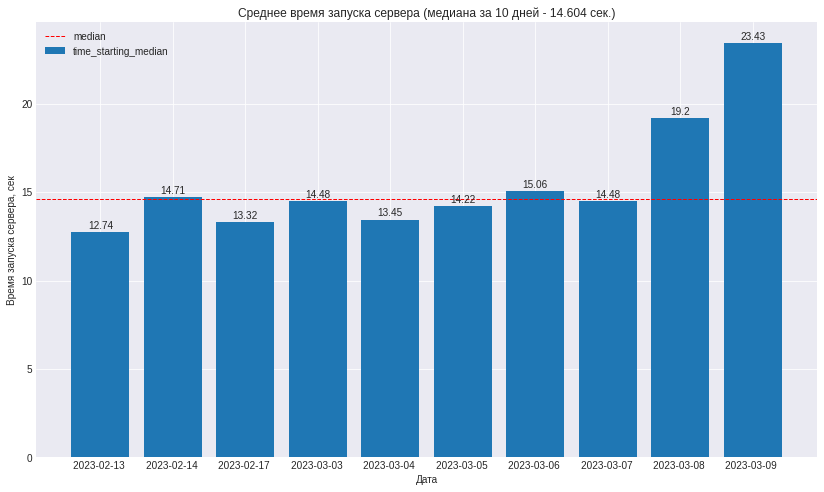

In [ ]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['time_starting_median'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "time_starting_median")

  plt.axhline(y=med_starting, color='red', linestyle='--', linewidth=1, label='median')

  for i, total in enumerate(values_y):
    ax.text(i, total + 0.2, round(values_y[i], 2), ha='center')

  plt.title(f'Среднее время запуска сервера (медиана за {len(groups_x)} дней - {med_starting} сек.)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Время запуска сервера, сек')
  plt.show()

Из графика видим, что среднее время запуска сервера увиличилось в последние дни, предполагаю, что это связано с установкой дополнительных плагинов.

#### Остановка сервера

С остановками сервера более интересно. Корректная остановка работы сервера осуществляется из консоли сервера или из консоли игрока с правом доступа (op) командой `stop`. Это штатный режим завершения работы за которым идет сохранение параметров сервера.

Найдем когда сервер останавливался. Остановка сервера начинается с сообщения "Stopping the server"

In [ ]:
df_is_stop = sub_summary['serv_mess'].map(lambda x: 'Stopping the server' in x).to_frame(name='is_stop')
ind_is_stop = df_is_stop[df_is_stop['is_stop'] == True].index
len(ind_is_stop)

11

Число запусков было другое

In [ ]:
len(ind_is_start)

27

Упростим задачу, будем считать, что сервер запускается днем и останавливается до 00:00, без перехода через 00:00.

In [ ]:
plot_df = sub_summary[sub_summary.index.isin(ind_is_stop)][['date', 'serv_mess']].groupby(['date']).count().reset_index()
plot_df

,date,serv_mess
0,2023-02-13,1
1,2023-02-14,2
2,2023-02-17,1
3,2023-03-03,2
4,2023-03-04,1
5,2023-03-06,3
6,2023-03-09,1


In [ ]:
# vibo: у нас есть три дня, когда сервер корректно не выключался
find_days = set(groups_x_is_start) - set(plot_df['date'].values)
find_days

{'2023-03-05 ', '2023-03-07 ', '2023-03-08 '}

In [ ]:
# vibo: создадим датафрейм
df_find_days = pd.DataFrame({'date': list(find_days)})
df_find_days

,date
0,2023-03-05
1,2023-03-08
2,2023-03-07


In [ ]:
# vibo: добавляем дни без корректного завершения в датафрейм
plot_df = plot_df.append(df_find_days, ignore_index=True)
plot_df = plot_df.fillna(0)
plot_df = plot_df.sort_values('date')
plot_df

<ipython-input-37-cad278c68816>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(df_find_days, ignore_index=True)


,date,serv_mess
0,2023-02-13,1.0
1,2023-02-14,2.0
2,2023-02-17,1.0
3,2023-03-03,2.0
4,2023-03-04,1.0
7,2023-03-05,0.0
5,2023-03-06,3.0
9,2023-03-07,0.0
8,2023-03-08,0.0
6,2023-03-09,1.0


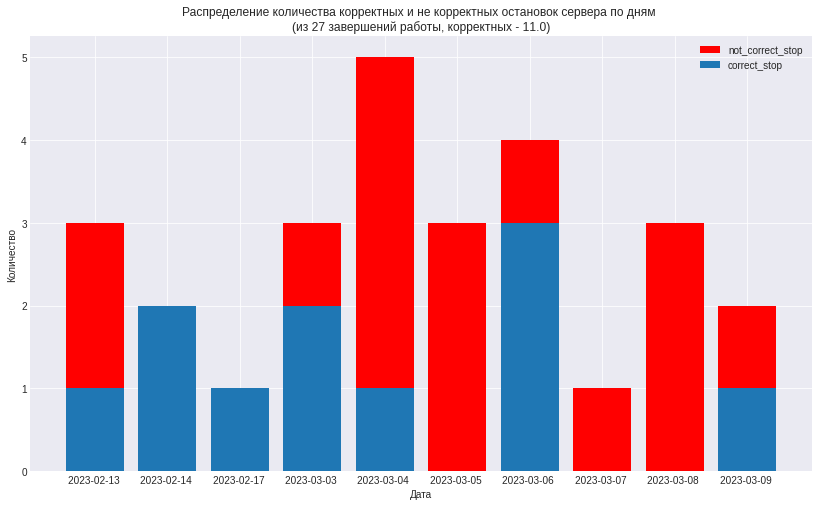

In [ ]:
# vibo: data
groups_x_is_corr_stop = plot_df['date'].values
groups_y_is_corr_stop = plot_df['serv_mess'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x_is_start, values_y_is_start, label = "not_correct_stop", color='red')
  ax.bar(groups_x_is_corr_stop, groups_y_is_corr_stop, label = "correct_stop")

  # for i, total in enumerate(values_y):
  #   ax.text(i, total + 0.1, values_y[i], ha='center')

  plt.title(f'Распределение количества корректных и не корректных остановок сервера по дням \n(из {sum(values_y_is_start)} завершений работы, корректных - {sum(groups_y_is_corr_stop)})')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество')
  plt.show()

ВНИМАНИЕ! При не корректной остановке сервера весь игровой прогресс может быть потерян. Найдем сообщения об успешном сохранении параметров сервера, их такое же количество

In [ ]:
df_save_is_ok = sub_summary['serv_mess'].map(lambda x: 'All dimensions are saved' in x).to_frame(name='save_is_ok')
ind_save_is_ok = df_save_is_ok[df_save_is_ok['save_is_ok'] == True].index
len(ind_save_is_ok)

11

#### Игроки на сервере

##### **join**

Когда игрок появляется на сервере это фиксируется соответствующим сообщением (join)

In [ ]:
# vibo: смотрим сколько раз появлялось сообщение join
sub_summary['is_user_join'] = sub_summary['serv_mess'].map(lambda x: 'join' in x)
ind_user_join = sub_summary[sub_summary['is_user_join'] == True].index
len(ind_user_join)

88

In [ ]:
sub_summary[sub_summary.index.isin(ind_user_join)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join
394,2023-02-13,21:49:48,Server thread,INFO,vibO joined the game,True
567,2023-02-13,22:01:25,Server thread,INFO,vibO joined the game,True
915,2023-02-14,23:53:33,Server thread,INFO,vibO joined the game,True
1096,2023-02-17,19:05:26,Server thread,INFO,YOUTUBE_plaY joined the game,True
1102,2023-02-17,19:07:53,Server thread,INFO,YOUTUBE_plaY joined the game,True
...,...,...,...,...,...,...
6536,2023-03-09,17:58:28,Server thread,INFO,ARTEXX joined the game,True
6541,2023-03-09,18:01:54,Server thread,INFO,ARTEEXX joined the game,True
6547,2023-03-09,18:04:00,Server thread,INFO,AARRTTEEXX joined the game,True
6554,2023-03-09,18:16:03,Server thread,INFO,ARTEXX joined the game,True


Выделим имена тех, кто зашел на сервер

In [ ]:
plot_df = sub_summary[sub_summary.index.isin(ind_user_join)]
plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])
plot_df = plot_df[['date', 'time', 'user_name']]
plot_df

<ipython-input-42-3fa95463e37a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])


,date,time,user_name
394,2023-02-13,21:49:48,vibO
567,2023-02-13,22:01:25,vibO
915,2023-02-14,23:53:33,vibO
1096,2023-02-17,19:05:26,YOUTUBE_plaY
1102,2023-02-17,19:07:53,YOUTUBE_plaY
...,...,...,...
6536,2023-03-09,17:58:28,ARTEXX
6541,2023-03-09,18:01:54,ARTEEXX
6547,2023-03-09,18:04:00,AARRTTEEXX
6554,2023-03-09,18:16:03,ARTEXX


Сколько раз заходили

In [ ]:
plot_df[['date', 'user_name', 'time']].groupby(['date', 'user_name'])['time'].count()

date         user_name       
2023-02-13   vibO                 2
2023-02-14   vibO                 1
2023-02-17   YOUTUBE_plaY         5
             vibo                 3
2023-03-03   LOLOTUK              2
             YOUTUBE_plaY         1
             rex                  3
2023-03-04   rex                  3
2023-03-05   YOUTUBE_plaY         3
             amogoos              7
             amogoos_red          1
             amogoos_red15050     1
             gggggg102            1
             testing1             1
             vibo                 3
2023-03-06   amogoos              2
             testing1            13
             testing2             7
             testing3             1
             testing4             1
2023-03-07   Fredi                3
             amogoos              3
             gggggg102            2
             test_name_1          1
             testing1             1
2023-03-08   Umni4ok100200        1
             aaaaa                

##### **left**

Когда игрок покидает сервер это фиксируется соответствующим сообщением (left)

In [ ]:
sub_summary['is_user_left'] = sub_summary['serv_mess'].map(lambda x: 'left' in x)
ind_user_left = sub_summary[sub_summary['is_user_left'] == True].index
len(ind_user_left)

83

Количество снова не совпадает, т.к. имели место не корректные завершения работыы сервера.

In [ ]:
sub_summary[sub_summary.index.isin(ind_user_left)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left
404,2023-02-13,21:57:51,Server thread,INFO,vibO left the game,False,True
573,2023-02-14,00:15:19,Server thread,INFO,vibO left the game,False,True
925,2023-02-14,23:58:51,Server thread,INFO,vibO left the game.,False,True
1100,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY left the game,False,True
1132,2023-02-17,19:34:51,Server thread,INFO,vibo left the game,False,True
...,...,...,...,...,...,...,...
6281,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ left the game,False,True
6539,2023-03-09,17:59:49,Server thread,INFO,ARTEXX left the game,False,True
6545,2023-03-09,18:02:56,Server thread,INFO,ARTEEXX left the game,False,True
6552,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX left the game,False,True


Выделим имена тех, кто покинул сервер

In [ ]:
plot_df = sub_summary[sub_summary.index.isin(ind_user_left)]
plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])
plot_df = plot_df[['date', 'time', 'user_name']]
plot_df

<ipython-input-46-339be6699b0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])


,date,time,user_name
404,2023-02-13,21:57:51,vibO
573,2023-02-14,00:15:19,vibO
925,2023-02-14,23:58:51,vibO
1100,2023-02-17,19:07:04,YOUTUBE_plaY
1132,2023-02-17,19:34:51,vibo
...,...,...,...
6281,2023-03-09,21:25:30,_Rocket5500_
6539,2023-03-09,17:59:49,ARTEXX
6545,2023-03-09,18:02:56,ARTEEXX
6552,2023-03-09,18:04:34,AARRTTEEXX


Сколько раз выходили

In [ ]:
plot_df[['date', 'user_name', 'time']].groupby(['date', 'user_name'])['time'].count()

date         user_name       
2023-02-13   vibO                 1
2023-02-14   vibO                 2
2023-02-17   YOUTUBE_plaY         5
             vibo                 3
2023-03-03   LOLOTUK              2
             YOUTUBE_plaY         1
             rex                  3
2023-03-04   rex                  3
2023-03-05   YOUTUBE_plaY         2
             amogoos              6
             amogoos_red          1
             amogoos_red15050     1
             gggggg102            1
             testing1             1
             vibo                 2
2023-03-06   amogoos              2
             testing1            12
             testing2             7
             testing3             1
             testing4             1
2023-03-07   Fredi                3
             amogoos              3
             gggggg102            2
             test_name_1          1
             testing1             1
2023-03-08   Umni4ok100200        1
             aaaaa                

С покиданием сервера все тоже не так просто. Перед тем как игрок покидает игру в логах есть сообщение 'lost connection', которое имеет свое пояснение. Посмотрим нa эти сообщения.

In [ ]:
sub_summary['is_lost_connection'] = sub_summary['serv_mess'].map(lambda x: 'lost connection' in x)
ind_lost_connection = sub_summary[sub_summary['is_lost_connection'] == True].index
len(ind_lost_connection)

83

In [ ]:
sub_summary[sub_summary.index.isin(ind_lost_connection)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,True
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,True
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,True
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,True
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,True
...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,True
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,True
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,True
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,True


Вынесем в один столбец причину по которой игрок покинул сервер

In [ ]:
sub_summary['reason_lost_connection'] = sub_summary[sub_summary.index.isin(ind_lost_connection)]['serv_mess'].map(lambda x: ' '.join(x.split()[3:]))
sub_summary['user_name'] = sub_summary[sub_summary.index.isin(ind_lost_connection)]['serv_mess'].map(lambda x: x.split()[0])
sub_summary[sub_summary['is_lost_connection'] == True]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,user_name
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,True,Disconnected,vibO
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,True,Disconnected,vibO
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,True,Server closed,vibO
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,True,Disconnected,YOUTUBE_plaY
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,True,Disconnected,vibo
...,...,...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,True,Disconnected,_Rocket5500_
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,True,Disconnected,ARTEXX
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,True,Disconnected,ARTEEXX
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,True,Disconnected,AARRTTEEXX


In [ ]:
sub_summary[sub_summary['is_lost_connection'] == True][['user_name', 'reason_lost_connection', 'serv_mess']].groupby(['user_name', 'reason_lost_connection']).count()

serv_mess
user_name        reason_lost_connection                                  
AARRTTEEXX       Disconnected                                           1
ARTEEXX          Disconnected                                           1
ARTEXX           Disconnected                                           2
Fredi            Disconnected                                           3
LOLOTUK          Disconnected                                           2
Umni4ok100200    Disconnected                                           1
YOUTUBE_plaY     Disconnected                                           7
                 You are banned from this server                        1
_Rocket5500_     Disconnected                                           2
aaaaa            Disconnected                                           3
amogoos          Disconnected                                          10
                 You dropped your items too quickly (Hacking?)          1
amogoos_red      Disconnected                                           1
amogoos_red15050 Disconnected                                           1
gggggg102        Disconnected                                           3
rex              Disconnected                                           5
                 Server closed                                          1
test_name_1      Disconnected                                           1
testing1         Disconnected                                           9
                 Server closed                                          1
                 You logged in from another location                    4
testing2         Disconnected                                           8
                 Server closed                                          1
testing3         Disconnected                                           4
testing4         Disconnected                                           1
vibO             Disconnected                                           2
                 Server closed                                          1
vibo             Disconnected                                           5
                 You are banned from this server                        1

In [ ]:
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    5003 non-null   object
 1   time                    5003 non-null   object
 2   serv_teg_inf            5003 non-null   object
 3   serv_teg                5003 non-null   object
 4   serv_mess               5003 non-null   object
 5   is_user_join            5003 non-null   bool  
 6   is_user_left            5003 non-null   bool  
 7   is_lost_connection      5003 non-null   bool  
 8   reason_lost_connection  83 non-null     object
 9   user_name               83 non-null     object
dtypes: bool(3), object(7)
memory usage: 327.3+ KB


In [ ]:
sub_summary['reason_lost_connection'].describe()

count               83
unique               5
top       Disconnected
freq                72
Name: reason_lost_connection, dtype: object

In [ ]:
plot_df = sub_summary[sub_summary['is_lost_connection'] == True][['reason_lost_connection', 'is_lost_connection']].groupby(['reason_lost_connection']).count().reset_index()
plot_df['%'] = plot_df['is_lost_connection'] * 100 / plot_df['is_lost_connection'].sum()
plot_df['%'] = plot_df['%'].round(2)
plot_df = plot_df.sort_values('is_lost_connection', ascending=False)
plot_df

,reason_lost_connection,is_lost_connection,%
0,Disconnected,72,86.75
1,Server closed,4,4.82
4,You logged in from another location,4,4.82
2,You are banned from this server,2,2.41
3,You dropped your items too quickly (Hacking?),1,1.20


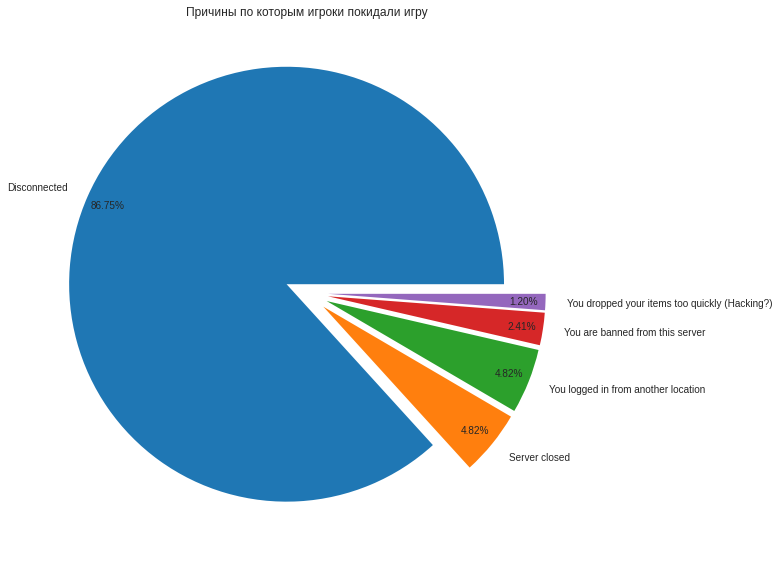

In [ ]:
sort_labels = list(plot_df['reason_lost_connection'].values)

labels = plot_df['reason_lost_connection'].values
value = plot_df['is_lost_connection'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0.1, 0.1, 0.1, 0.1, 0.1]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.2f%%', labeldistance=1.1)

  plt.title(f'Причины по которым игроки покидали игру')
  # ax.legend(loc='best')
  plt.show()

Итого возможные варианты покидания сервера игроком (на текущий момент):
* `Disconnected` - стандартный выход из игры;
* `Server closed` - при штатной остановке сервера, если в этот момент игрок играл на сервере;
* `You are banned from this server` - если игрока забаннили;
* `You dropped your items too quickly (Hacking?)` - подозрение в хаккинге;
* `You logged in from another location` - повторная авторизация с другого компьютера.

Еще есть такое сообщение как fell out, формально вы еще на сервере, но вылетели из игры, т.к. кто-то с правили (op) выполнил команду kill user_name.

In [ ]:
sub_summary['is_fell_out'] = sub_summary['serv_mess'].map(lambda x: 'fell out' in x)
ind_fell_out = sub_summary[sub_summary['is_fell_out'] == True].index
len(ind_fell_out)

6

Узнаем кому так повезло

In [ ]:
sub_summary[sub_summary.index.isin(ind_fell_out)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,user_name,is_fell_out
3304,2023-03-05,14:54:55,Server thread,INFO,vibo fell out of the world,False,False,False,NaN,NaN,True
4254,2023-03-06,21:02:12,Server thread,INFO,testing2 fell out of the world,False,False,False,NaN,NaN,True
5768,2023-03-08,19:58:07,Server thread,INFO,testing2 fell out of the world,False,False,False,NaN,NaN,True
5774,2023-03-08,19:59:10,Server thread,INFO,testing2 fell out of the world,False,False,False,NaN,NaN,True
5788,2023-03-08,20:04:55,Server thread,INFO,testing2 fell out of the world,False,False,False,NaN,NaN,True
6245,2023-03-09,18:45:09,Server thread,INFO,_Rocket5500_ fell out of the world,False,False,False,NaN,NaN,True


In [ ]:
# vibo: сохраняемся
sub_summary.to_csv('/content/drive/MyDrive/minecraft/sub_summary_server_thread.csv')

#### Игровой таймлайн

In [ ]:
# vibo: читаем
sub_summary = pd.read_csv('/content/drive/MyDrive/minecraft/sub_summary_server_thread.csv', index_col=0)

In [ ]:
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    5003 non-null   object
 1   time                    5003 non-null   object
 2   serv_teg_inf            5003 non-null   object
 3   serv_teg                5003 non-null   object
 4   serv_mess               5003 non-null   object
 5   is_user_join            5003 non-null   bool  
 6   is_user_left            5003 non-null   bool  
 7   is_lost_connection      5003 non-null   bool  
 8   reason_lost_connection  83 non-null     object
 9   user_name               83 non-null     object
 10  is_fell_out             5003 non-null   bool  
dtypes: bool(4), object(7)
memory usage: 332.2+ KB


In [ ]:
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,user_name,is_fell_out
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,False,False,False,NaN,NaN,False
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,False,False,False,NaN,NaN,False
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,False,False,False,NaN,NaN,False
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,False,False,False,NaN,NaN,False
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,False,False,False,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,False,True,False,NaN,NaN,False
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,True,False,False,NaN,NaN,False
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,False,False,False,NaN,NaN,False
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,False,False,False,NaN,NaN,False


In [ ]:
# vibo: делаем столбец для перехода в pd.to_datetime
sub_summary['date_time'] = sub_summary['date'] + ' ' + sub_summary['time']
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,user_name,is_fell_out,date_time
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,False,False,False,NaN,NaN,False,2023-02-13 21:34:07
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,False,False,False,NaN,NaN,False,2023-02-13 21:34:07
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,False,False,False,NaN,NaN,False,2023-02-13 21:34:07
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,False,False,False,NaN,NaN,False,2023-02-13 21:34:07
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,False,False,False,NaN,NaN,False,2023-02-13 21:34:07
...,...,...,...,...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,False,True,False,NaN,NaN,False,2023-03-09 18:45:12
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,True,False,False,NaN,NaN,False,2023-03-09 18:50:50
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,False,False,False,NaN,NaN,False,2023-03-09 18:50:50
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,False,False,False,NaN,NaN,False,2023-03-09 18:52:31


In [ ]:
# vibo: преобразовываем тип данных столбца, проверяем
sub_summary['date_time'] = pd.to_datetime(sub_summary['date_time'])
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    5003 non-null   object        
 1   time                    5003 non-null   object        
 2   serv_teg_inf            5003 non-null   object        
 3   serv_teg                5003 non-null   object        
 4   serv_mess               5003 non-null   object        
 5   is_user_join            5003 non-null   bool          
 6   is_user_left            5003 non-null   bool          
 7   is_lost_connection      5003 non-null   bool          
 8   reason_lost_connection  83 non-null     object        
 9   user_name               83 non-null     object        
 10  is_fell_out             5003 non-null   bool          
 11  date_time               5003 non-null   datetime64[ns]
dtypes: bool(4), datetime64[ns](1), object(7)
memory 

In [ ]:
sub_summary[sub_summary['date'] == '2023-03-06']

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,user_name,is_fell_out,date_time


##### **Старт сервера**

In [ ]:
df_is_start = sub_summary['serv_mess'].map(lambda x: 'Starting minecraft server' in x).to_frame(name='is_start')
ind_is_start = df_is_start[df_is_start['is_start'] == True].index
len(ind_is_start)

27

##### **Сервер запущен**

In [ ]:
df_done = sub_summary['serv_mess'].map(lambda x: 'Done' in x).to_frame(name='done')
ind_done = df_done[df_done['done'] == True].index
len(ind_done)

27

##### **Игрок присоединился к серверу**

In [ ]:
ind_user_join = sub_summary[sub_summary['is_user_join'] == True].index
len(ind_user_join)

88

##### **С игроком потеряно соединение**

In [ ]:
ind_lost_connection = sub_summary[sub_summary['is_lost_connection'] == True].index
len(ind_lost_connection)

83

По причине:

In [ ]:
sub_summary[sub_summary.index.isin(ind_lost_connection)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,user_name,is_fell_out,date_time
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,True,Disconnected,vibO,False,2023-02-13 21:57:51
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,True,Disconnected,vibO,False,2023-02-14 00:15:19
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,True,Server closed,vibO,False,2023-02-14 23:58:51
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,True,Disconnected,YOUTUBE_plaY,False,2023-02-17 19:07:04
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,True,Disconnected,vibo,False,2023-02-17 19:34:51
...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,True,Disconnected,_Rocket5500_,False,2023-03-09 21:25:30
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,True,Disconnected,ARTEXX,False,2023-03-09 17:59:49
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,True,Disconnected,ARTEEXX,False,2023-03-09 18:02:55
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,True,Disconnected,AARRTTEEXX,False,2023-03-09 18:04:34


##### **Игрок покинул сервер**

In [ ]:
ind_user_left = sub_summary[sub_summary['is_user_left'] == True].index
len(ind_user_left)

83

##### **Игрок выпал из мира**

In [ ]:
ind_fell_out = sub_summary[sub_summary['is_fell_out'] == True].index
len(ind_fell_out)

6

##### **Остановка сервера**

In [ ]:
df_is_stop = sub_summary['serv_mess'].map(lambda x: 'Stopping the server' in x).to_frame(name='is_stop')
ind_is_stop = df_is_stop[df_is_stop['is_stop'] == True].index
len(ind_is_stop)

11

##### **Успешное сохранение состояния**

In [ ]:
df_save_is_ok = sub_summary['serv_mess'].map(lambda x: 'All dimensions are saved' in x).to_frame(name='save_is_ok')
ind_save_is_ok = df_save_is_ok[df_save_is_ok['save_is_ok'] == True].index
len(ind_save_is_ok)

11

#### Операторы сервера

Продолжаем выделять информацию из дополнительного сообщения сервера, посмотрим, кто из пользователей был наделен правом оператора сервера.

In [ ]:
summary['is_op'] = summary['serv_mess'].map(lambda x: 'server operator' in x).to_frame()
summary[summary['is_op'] == True][['date', 'time', 'serv_mess', 'is_op']]

,date,time,serv_mess,is_op
400,2023-02-13,21:57:06,Made vibO a server operator,True
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1159,2023-02-17,19:45:04,Made vibo a server operator,True
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1629,2023-03-03,19:42:04,Made rex a server operator,True
3180,2023-03-05,12:57:45,Made amogoos a server operator,True
3205,2023-03-05,13:13:49,Made amogoos a server operator,True
3580,2023-03-05,15:33:25,Made testing1 a server operator,True
3920,2023-03-06,20:26:21,Made testing2 a server operator,True
4265,2023-03-06,21:04:44,Made testing3 a server operator,True


In [ ]:
ind_op = summary[summary['is_op'] == True].index
ind_op

Int64Index([ 400, 1104, 1159, 1384, 1629, 3180, 3205, 3580, 3920, 4265, 4981,
            5004, 5387, 5634, 5647, 6241, 6276, 6277, 6278, 6560],
           dtype='int64')

In [ ]:
summary[summary.index.isin(ind_op)][['date', 'time', 'serv_mess', 'is_op']]

,date,time,serv_mess,is_op
400,2023-02-13,21:57:06,Made vibO a server operator,True
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1159,2023-02-17,19:45:04,Made vibo a server operator,True
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1629,2023-03-03,19:42:04,Made rex a server operator,True
3180,2023-03-05,12:57:45,Made amogoos a server operator,True
3205,2023-03-05,13:13:49,Made amogoos a server operator,True
3580,2023-03-05,15:33:25,Made testing1 a server operator,True
3920,2023-03-06,20:26:21,Made testing2 a server operator,True
4265,2023-03-06,21:04:44,Made testing3 a server operator,True


In [ ]:
# vibo: выделим имя оператора сервера
summary['op_name'] = summary[summary.index.isin(ind_op)]['serv_mess'].map(lambda x: x.split()[1])
summary[summary['is_op'] == True][['date', 'time', 'serv_mess', 'is_op', 'op_name']]

,date,time,serv_mess,is_op,op_name
400,2023-02-13,21:57:06,Made vibO a server operator,True,vibO
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True,YOUTUBE_plaY
1159,2023-02-17,19:45:04,Made vibo a server operator,True,vibo
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True,LOLOTUK
1629,2023-03-03,19:42:04,Made rex a server operator,True,rex
3180,2023-03-05,12:57:45,Made amogoos a server operator,True,amogoos
3205,2023-03-05,13:13:49,Made amogoos a server operator,True,amogoos
3580,2023-03-05,15:33:25,Made testing1 a server operator,True,testing1
3920,2023-03-06,20:26:21,Made testing2 a server operator,True,testing2
4265,2023-03-06,21:04:44,Made testing3 a server operator,True,testing3


In [ ]:
# vibo: уникальные пользователи, получившие права оператора сервера
sorted(list(summary[summary['is_op'] == True]['op_name'].unique()))

['ARTEXX',
 'Fredi',
 'LOLOTUK',
 'Umni4ok100200',
 'YOUTUBE_plaY',
 '_Rocket5500_',
 'aaaaa',
 'amogoos',
 'rex',
 'testing1',
 'testing2',
 'testing3',
 'vibO',
 'vibo']

In [ ]:
# vibo: количество уникальных пользователей, получивших права оператора сервера
len(list(summary[summary['is_op'] == True]['op_name'].unique()))

14

In [ ]:
# vibo: когда были выданы права администратора
summary[summary['is_op'] == True].groupby(['date', 'time', 'op_name'])[['op_name']].size()

date         time      op_name      
2023-02-13   21:57:06  vibO             1
2023-02-17   19:10:02  YOUTUBE_plaY     1
             19:45:04  vibo             1
2023-03-03   18:03:24  LOLOTUK          1
             19:42:04  rex              1
2023-03-05   12:57:45  amogoos          1
             13:13:49  amogoos          1
             15:33:25  testing1         1
2023-03-06   20:26:21  testing2         1
             21:04:44  testing3         1
2023-03-07   14:49:00  Fredi            1
             18:01:36  Fredi            1
2023-03-08   14:28:35  Umni4ok100200    1
             16:58:22  aaaaa            1
             17:02:38  aaaaa            1
2023-03-09   18:19:51  ARTEXX           1
             18:43:23  _Rocket5500_     1
             21:24:05  _Rocket5500_     1
             21:24:38  _Rocket5500_     1
             21:24:50  _Rocket5500_     1
dtype: int64

### А что еще?

In [ ]:
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,is_op,op_name
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,False,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,False,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,False,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,False,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN,False,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,False,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,False,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,False,NaN


Информации в `serv_mess` много, вот, например, что можно:
* вывести время загрузки сервера от старта до метки `Done` (например, `66.075s`);
* найти время работы сервера (между `Starting minecraft server` и `Stopping server`);
* найти время игры каждого пользователя (`vibO joined the game` и `vibO left the game`);
* найти сколько раз игрок погибал и по какой причине (застрелен скелетом, утонул и т.д.);
* найти время 'жизни' персонажа в реальном времение между началом игры и смертью;
* найти кто к кому телепортируется и таким образом строить граф взаимодействия между игроками.